In this notebook, we do data imputation with MICE (Multiple Imputation with Chained Equations)

# 1. Load data & declare variables

In [1]:
# !pip install impyute

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from impyute.imputation.cs import mice
import xgboost as xgb
import miceforest as mf
from sklearn.metrics import roc_curve, confusion_matrix, auc, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score
from tensorflow import keras
from tensorflow.keras import layers
from fancyimpute import KNN

(CVXPY) Oct 12 01:01:02 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/minwukim/anaconda3/lib/python3.11/site-packages/cvxopt/base.cpython-311-darwin.so, 0x0002): Library not loaded: @rpath/liblapack.3.dylib\n  Referenced from: <E25E40AB-7857-39B9-8DE7-28B7B0E4806B> /Users/minwukim/anaconda3/lib/python3.11/site-packages/cvxopt/base.cpython-311-darwin.so\n  Reason: tried: '/Users/minwukim/anaconda3/lib/python3.11/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/minwukim/anaconda3/lib/python3.11/site-packages/cvxopt/../../../liblapack.3.dylib' (no such file), '/Users/minwukim/anaconda3/bin/../lib/liblapack.3.dylib' (no such file), '/Users/minwukim/anaconda3/bin/../lib/liblapack.3.dylib' (no such file), '/usr/local/lib/liblapack.3.dylib' (no such file), '/usr/lib/liblapack.3.dylib' (no such file, not in dyld cache)")
(CVXPY) Oct 12 01:01:02 PM: Encountered unexpected exception importing solver GLPK:
ImportError("dlopen(/Use

In [3]:
df = pd.read_csv('../database/2016-2022_semantic_imputation.csv')

In [4]:
binary = ['unequal_voting','classified_board_system','poison_pill','operating_margin_below_3y_average']
non_ratio_variables = [
    "capex",
    "net_capex",
    "short_term_wc",
    "long_term_wc",
    "modified_wc",
    "ebitda",
    "ebit",
    "net_income",
    "net_debt",
    "ev",
    "repurchase",
    "board_size",
    "net_repurchase",
    "total_compensation_to_executives",
    "total_compensation_to_board_members",
    "dividend_to_common",
    "dividend_to_preferred"
]

df['ev_ebitda'] = np.where((df['ev'] != 0) & (df['ebitda'] != 0), df['ev'] / df['ebitda'], np.nan)
df['ev_ebit'] = np.where((df['ev'] != 0) & (df['ebit'] != 0), df['ev'] / df['ebit'], np.nan)

ratio_variables = [
    "ebitda_margin",
    "operating_margin",
    "sales_to_total_assets",
    "roe",
    "normalized_roe",
    "operating_roe",
    "operating_roic",
    "eps_adjusted_diluted",
    "ev_to_sales",
    "tobin_q_ratio",
    "pb_ratio",
    "pe_ratio",
    "fcf_to_equity",
    "sales_growth_rate",
    "dividend_per_share",
    "dividend_payout_ratio",
    "asset_to_equity",
    "cash_conversion_cycle",
    "ev_ebitda",
    "ev_ebit",
]

technical_variables = [
    "free_float_percentage",
    "rsi_14d",
    "rsi_30d",
    "volatility_30d",
    "volatility_90d",
    "volatility_180d",
    "volume_30d_average_to_outstanding",
    "insider_shares_percentage",
    "institution_ownership_percentage",
    "ceo_tenure",
    "total_return_5y",
    "total_return_4y",
    "total_return_3y",
    "total_return_2y",
    "total_return_1y",
    "total_return_6m",
    "total_return_3m",
    "employee_growth_rate",
    "fcf_yield"
]

supportive = ["bic_level_2","bic_level_3","market_cap"]
factors = binary + non_ratio_variables + ratio_variables + technical_variables
# factors.append("targeted")

# 2. Conduct data imputation with MICE forest

In [5]:
df["bic_level_2"] = df["bic_level_2"].astype('category')
df["bic_level_3"] = df["bic_level_3"].astype('category')

In [6]:
from fancyimpute import KNN
knn_imputer = KNN(k=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df[factors]), columns=factors, index=df[factors].index)

Imputing row 1/18213 with 5 missing, elapsed time: 72.615
Imputing row 101/18213 with 2 missing, elapsed time: 72.683
Imputing row 201/18213 with 3 missing, elapsed time: 72.719
Imputing row 301/18213 with 4 missing, elapsed time: 72.750
Imputing row 401/18213 with 1 missing, elapsed time: 72.782
Imputing row 501/18213 with 0 missing, elapsed time: 72.826
Imputing row 601/18213 with 1 missing, elapsed time: 72.870
Imputing row 701/18213 with 5 missing, elapsed time: 72.903
Imputing row 801/18213 with 3 missing, elapsed time: 72.935
Imputing row 901/18213 with 1 missing, elapsed time: 72.969
Imputing row 1001/18213 with 3 missing, elapsed time: 73.011
Imputing row 1101/18213 with 2 missing, elapsed time: 73.054
Imputing row 1201/18213 with 3 missing, elapsed time: 73.093
Imputing row 1301/18213 with 6 missing, elapsed time: 73.132
Imputing row 1401/18213 with 0 missing, elapsed time: 73.163
Imputing row 1501/18213 with 14 missing, elapsed time: 73.193
Imputing row 1601/18213 with 5 miss

Imputing row 13801/18213 with 1 missing, elapsed time: 77.920
Imputing row 13901/18213 with 2 missing, elapsed time: 77.958
Imputing row 14001/18213 with 4 missing, elapsed time: 77.991
Imputing row 14101/18213 with 5 missing, elapsed time: 78.042
Imputing row 14201/18213 with 1 missing, elapsed time: 78.081
Imputing row 14301/18213 with 1 missing, elapsed time: 78.118
Imputing row 14401/18213 with 0 missing, elapsed time: 78.157
Imputing row 14501/18213 with 7 missing, elapsed time: 78.186
Imputing row 14601/18213 with 0 missing, elapsed time: 78.220
Imputing row 14701/18213 with 9 missing, elapsed time: 78.260
Imputing row 14801/18213 with 1 missing, elapsed time: 78.291
Imputing row 14901/18213 with 6 missing, elapsed time: 78.331
Imputing row 15001/18213 with 5 missing, elapsed time: 78.369
Imputing row 15101/18213 with 9 missing, elapsed time: 78.407
Imputing row 15201/18213 with 5 missing, elapsed time: 78.442
Imputing row 15301/18213 with 2 missing, elapsed time: 78.478
Imputing

In [7]:
df_mf = pd.concat([df_imputed, df[['year', 'targeted',"market_cap","bic_level_2","bic_level_3"]]], axis=1)

# 3. Run models

In [8]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()
    
def plot_roc_curve(y_true, y_pred, label=None):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    if label:
        plt.legend()

Epoch 1/10
330/330 [==============================] - 1s 820us/step - loss: 0.2092 - accuracy: 0.9539 - val_loss: 0.1082 - val_accuracy: 0.9780
Epoch 2/10
330/330 [==============================] - 0s 638us/step - loss: 0.1725 - accuracy: 0.9648 - val_loss: 0.1063 - val_accuracy: 0.9780
Epoch 3/10
330/330 [==============================] - 0s 642us/step - loss: 0.1672 - accuracy: 0.9647 - val_loss: 0.1074 - val_accuracy: 0.9780
Epoch 4/10
330/330 [==============================] - 0s 635us/step - loss: 0.1639 - accuracy: 0.9647 - val_loss: 0.1044 - val_accuracy: 0.9780
Epoch 5/10
330/330 [==============================] - 0s 635us/step - loss: 0.1543 - accuracy: 0.9650 - val_loss: 0.1049 - val_accuracy: 0.9780
Epoch 6/10
330/330 [==============================] - 0s 634us/step - loss: 0.1540 - accuracy: 0.9650 - val_loss: 0.1041 - val_accuracy: 0.9780
Epoch 7/10
330/330 [==============================] - 0s 636us/step - loss: 0.1497 - accuracy: 0.9649 - val_loss: 0.1080 - val_accuracy:

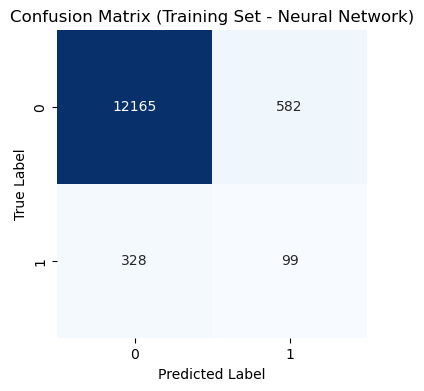

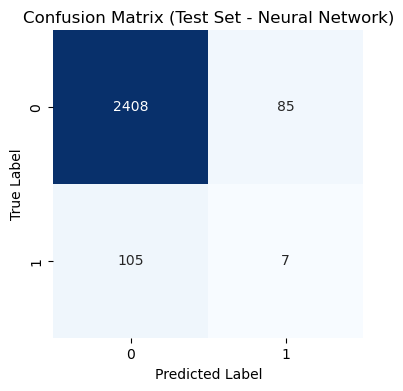

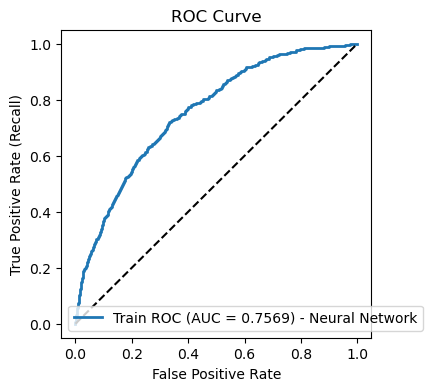

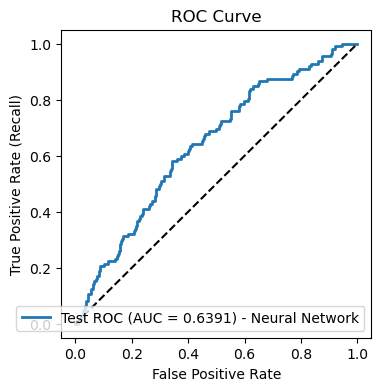

In [9]:
train_data = df_mf[df_mf['year'].isin([2016, 2017, 2018, 2019, 2020])]
test_data = df_mf[df_mf['year'] == 2021]

X_train = train_data[factors]
y_train = train_data['targeted']

X_test = test_data[factors]
y_test = test_data['targeted']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_train_nn = model.predict(X_train_scaled)
y_pred_test_nn = model.predict(X_test_scaled)

cm_train_nn = confusion_matrix(y_train, y_pred_train_nn > 0.1)
cm_test_nn = confusion_matrix(y_test, y_pred_test_nn > 0.1)

plot_confusion_matrix(cm_train_nn, 'Confusion Matrix (Training Set - Neural Network)')
plot_confusion_matrix(cm_test_nn, 'Confusion Matrix (Test Set - Neural Network)')

auc_train_nn = roc_auc_score(y_train, y_pred_train_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_test_nn)

plot_roc_curve(y_train, y_pred_train_nn, label=f"Train ROC (AUC = {auc_train_nn:.4f}) - Neural Network")
plot_roc_curve(y_test, y_pred_test_nn, label=f"Test ROC (AUC = {auc_test_nn:.4f}) - Neural Network")
plt.legend(loc="lower right")
plt.show()


In [10]:
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=14)

In [11]:
y_pred_train = cross_val_predict(xgboost_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
y_pred_test = xgboost_model.predict_proba(X_test)[:, 1]

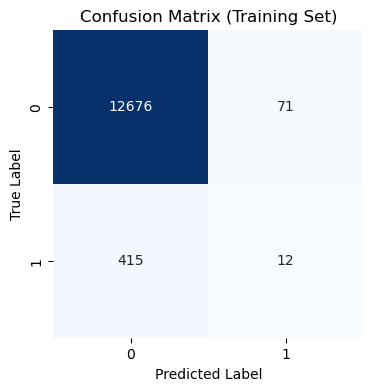

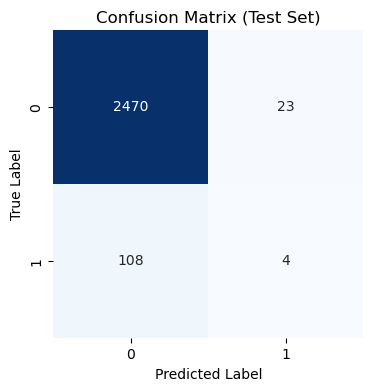

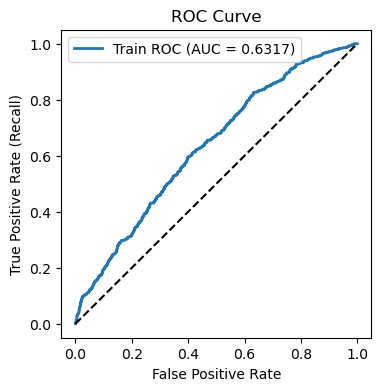

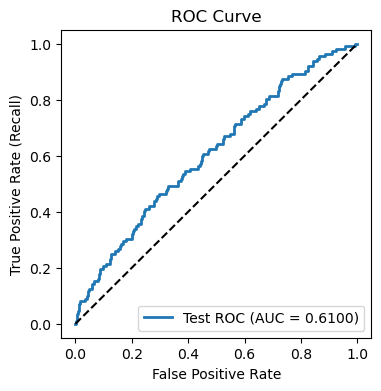

In [12]:
cm_train = confusion_matrix(y_train, y_pred_train > 0.1)
cm_test = confusion_matrix(y_test, y_pred_test > 0.1)

plot_confusion_matrix(cm_train, 'Confusion Matrix (Training Set)')
plot_confusion_matrix(cm_test, 'Confusion Matrix (Test Set)')

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

plot_roc_curve(y_train, y_pred_train, label=f"Train ROC (AUC = {auc_train:.4f})")
plot_roc_curve(y_test, y_pred_test, label=f"Test ROC (AUC = {auc_test:.4f})")
plt.legend(loc="lower right")
plt.show()


# 3. Conduct column creation

In [13]:
columns_to_process = [
    "capex",
    "net_capex",
    "short_term_wc",
    "long_term_wc",
    "modified_wc",
    "ebitda",
    "ebit",
    "net_income",
    "net_debt",
    "ev",
    "repurchase",
    "board_size",
    "net_repurchase",
    "total_compensation_to_executives",
    "total_compensation_to_board_members",
    "dividend_to_common",
    "dividend_to_preferred"
]

for col in columns_to_process:
    
    # 1. _percentile
    percentile_col = col + '_percentile'
    df_mf[percentile_col] = df_mf.groupby('year')[col].transform(lambda x: x.rank(pct=True) * 100)
    df_mf[percentile_col].fillna(50, inplace=True)
    
    # 2. _10bins_percentile
    df_mf['market_cap_bins'] = df_mf.groupby('year')['market_cap'].transform(lambda x: pd.cut(x, bins=10))
    percentile_10bins_col = col + '_10bins_percentile'
    df_mf[percentile_10bins_col] = df_mf.groupby(['year', 'market_cap_bins'])[col].transform(lambda x: x.rank(pct=True) * 100)
    df_mf[percentile_10bins_col].fillna(50, inplace=True)
    df_mf.drop('market_cap_bins', axis=1, inplace=True)

    # 3. _10bins_normalized
    df_mf['market_cap_bins'] = df_mf.groupby('year')['market_cap'].transform(lambda x: pd.qcut(x, 10, labels=False, duplicates='drop'))
    normalized_col = col + '_10bins_normalized'
    df_mf[normalized_col] = df_mf.groupby(['year', 'market_cap_bins'])[col].transform(lambda x: (x - x.mean()) / x.std())
    df_mf[normalized_col].fillna(0, inplace=True)
    df_mf.drop('market_cap_bins', axis=1, inplace=True)
    
    # 4. _div_market_cap
    div_market_cap_col = col + '_div_market_cap'
    df_mf[div_market_cap_col] = df_mf[col] / df_mf['market_cap']
    
    # 5. _div_log_market_cap
    df_mf['log_market_cap'] = np.log(df_mf['market_cap'])
    div_log_market_cap_col = col + '_div_log_market_cap'
    df_mf[div_log_market_cap_col] = df_mf[col] / df_mf['log_market_cap']
    
    for new_col in [div_market_cap_col, div_log_market_cap_col]:
        median_values = df_mf.groupby('year')[new_col].transform('median')
        df_mf[new_col].fillna(median_values, inplace=True)
    df_mf.drop('log_market_cap', axis=1, inplace=True)

In [14]:
columns_to_process = [
    "ebitda_margin",
    "operating_margin",
    "sales_to_total_assets",
    "roe",
    "normalized_roe",
    "operating_roe",
    "operating_roic",
    "eps_adjusted_diluted",
    "ev_to_sales",
    "tobin_q_ratio",
    "pb_ratio",
    "pe_ratio",
    "fcf_to_equity",
    "sales_growth_rate",
    "dividend_per_share",
    "dividend_payout_ratio",
    "asset_to_equity",
    "cash_conversion_cycle",
    "ev_ebitda",
    "ev_ebit",
]
def compute_percentile(group):
    if len(group) < 10:
        return pd.Series([None] * len(group), index=group.index, dtype=float)
    return group.rank(pct=True) * 100

def normalize(group):
    if len(group) < 10:
        return pd.Series([None] * len(group), index=group.index, dtype=float)
    return (group - group.mean()) / group.std()

for col in columns_to_process:
    percentile_col = col + '_industry_peers_percentile'
    df_mf[percentile_col] = df_mf.groupby(['year', 'bic_level_3'])[col].transform(compute_percentile)
    mask = df_mf[percentile_col].isna()
    df_mf.loc[mask, percentile_col] = df_mf[mask].groupby(['year', 'bic_level_2'])[col].transform(compute_percentile)
    df_mf[percentile_col].fillna(50, inplace=True)
    df_mf[percentile_col] = df_mf[percentile_col].astype(float)
    normalized_col = col + '_industry_peers_normalized'
    df_mf[normalized_col] = df_mf.groupby(['year', 'bic_level_3'])[col].transform(normalize)
    mask = df_mf[normalized_col].isna()
    df_mf.loc[mask, normalized_col] = df_mf[mask].groupby(['year', 'bic_level_2'])[col].transform(normalize)
    df_mf[normalized_col].fillna(0, inplace=True)
    df_mf[normalized_col] = df_mf[normalized_col].astype(float)
    df_mf[col].fillna(df_mf.groupby('year')[col].transform('median'), inplace=True)


In [15]:
new_factors = []
for col in non_ratio_variables:
    new_factors.extend([
        col,
        f'{col}_percentile',
        f'{col}_10bins_percentile',
        f'{col}_10bins_normalized',
        f'{col}_div_market_cap',
        f'{col}_div_log_market_cap'
    ])

for col in ratio_variables:
    new_factors.extend([
        col,
        f'{col}_industry_peers_percentile',
        f'{col}_industry_peers_normalized'
    ])

new_factors = new_factors + binary + technical_variables

# 5. Re-run models

Epoch 1/10
330/330 [==============================] - 0s 864us/step - loss: 0.2137 - accuracy: 0.9503 - val_loss: 0.1043 - val_accuracy: 0.9780
Epoch 2/10
330/330 [==============================] - 0s 743us/step - loss: 0.1735 - accuracy: 0.9642 - val_loss: 0.1044 - val_accuracy: 0.9780
Epoch 3/10
330/330 [==============================] - 0s 713us/step - loss: 0.1632 - accuracy: 0.9649 - val_loss: 0.1041 - val_accuracy: 0.9780
Epoch 4/10
330/330 [==============================] - 0s 730us/step - loss: 0.1529 - accuracy: 0.9646 - val_loss: 0.1048 - val_accuracy: 0.9780
Epoch 5/10
330/330 [==============================] - 0s 710us/step - loss: 0.1532 - accuracy: 0.9646 - val_loss: 0.1033 - val_accuracy: 0.9780
Epoch 6/10
330/330 [==============================] - 0s 708us/step - loss: 0.1468 - accuracy: 0.9650 - val_loss: 0.1048 - val_accuracy: 0.9780
Epoch 7/10
330/330 [==============================] - 0s 717us/step - loss: 0.1457 - accuracy: 0.9653 - val_loss: 0.1050 - val_accuracy:

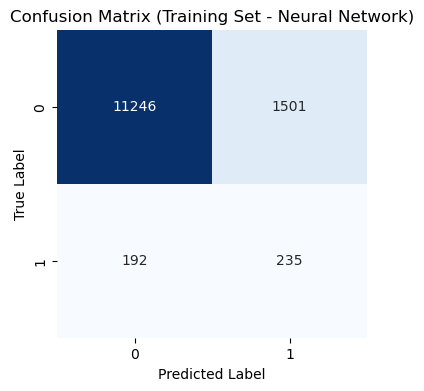

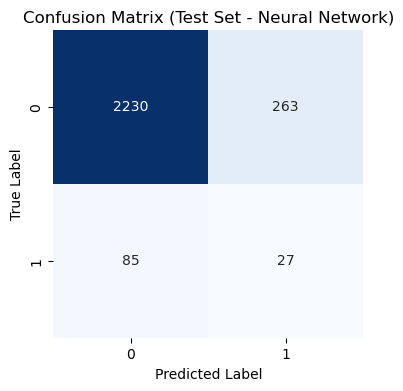

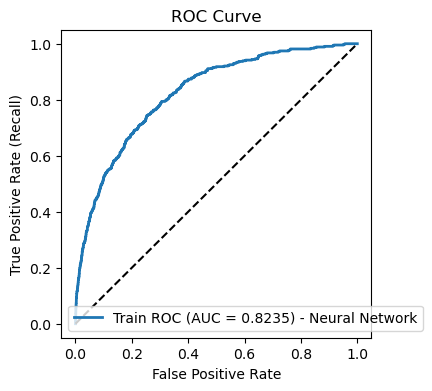

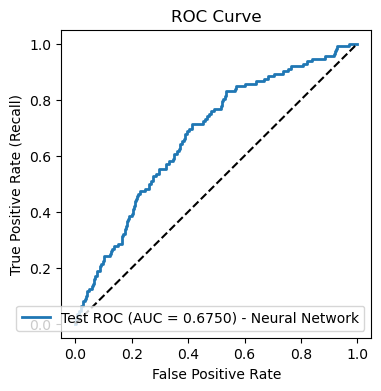

In [16]:
train_data = df_mf[df_mf['year'].isin([2016, 2017, 2018, 2019, 2020])]
test_data = df_mf[df_mf['year'] == 2021]

X_train = train_data[new_factors]
y_train = train_data['targeted']

X_test = test_data[new_factors]
y_test = test_data['targeted']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_train_nn = model.predict(X_train_scaled)
y_pred_test_nn = model.predict(X_test_scaled)

cm_train_nn = confusion_matrix(y_train, y_pred_train_nn > 0.1)
cm_test_nn = confusion_matrix(y_test, y_pred_test_nn > 0.1)

plot_confusion_matrix(cm_train_nn, 'Confusion Matrix (Training Set - Neural Network)')
plot_confusion_matrix(cm_test_nn, 'Confusion Matrix (Test Set - Neural Network)')

auc_train_nn = roc_auc_score(y_train, y_pred_train_nn)
auc_test_nn = roc_auc_score(y_test, y_pred_test_nn)

plot_roc_curve(y_train, y_pred_train_nn, label=f"Train ROC (AUC = {auc_train_nn:.4f}) - Neural Network")
plot_roc_curve(y_test, y_pred_test_nn, label=f"Test ROC (AUC = {auc_test_nn:.4f}) - Neural Network")
plt.legend(loc="lower right")
plt.show()


In [17]:
xgboost_model = xgb.XGBClassifier()
xgboost_model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=14)

In [18]:
y_pred_train = cross_val_predict(xgboost_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
y_pred_test = xgboost_model.predict_proba(X_test)[:, 1]

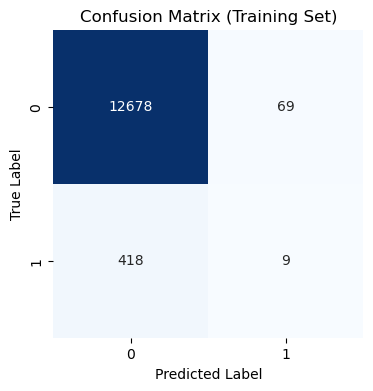

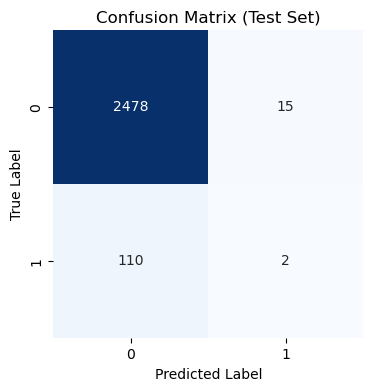

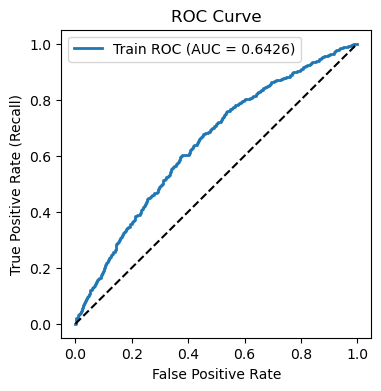

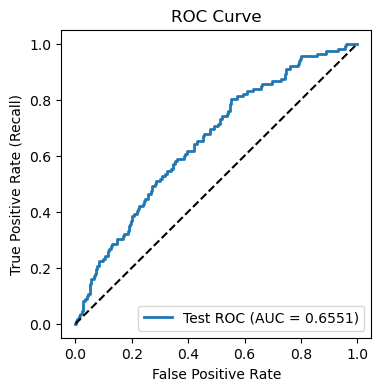

In [19]:
cm_train = confusion_matrix(y_train, y_pred_train > 0.1)
cm_test = confusion_matrix(y_test, y_pred_test > 0.1)

plot_confusion_matrix(cm_train, 'Confusion Matrix (Training Set)')
plot_confusion_matrix(cm_test, 'Confusion Matrix (Test Set)')

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

plot_roc_curve(y_train, y_pred_train, label=f"Train ROC (AUC = {auc_train:.4f})")
plot_roc_curve(y_test, y_pred_test, label=f"Test ROC (AUC = {auc_test:.4f})")
plt.legend(loc="lower right")
plt.show()

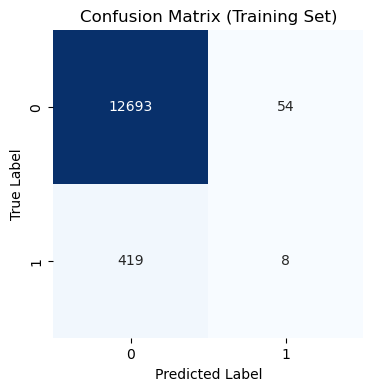

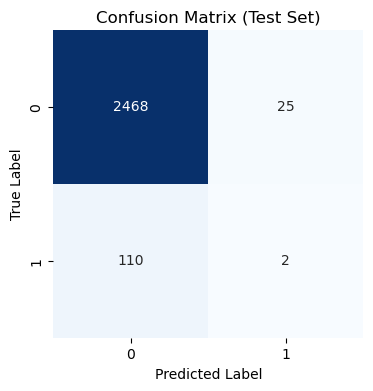

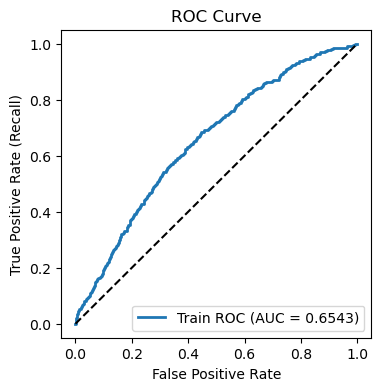

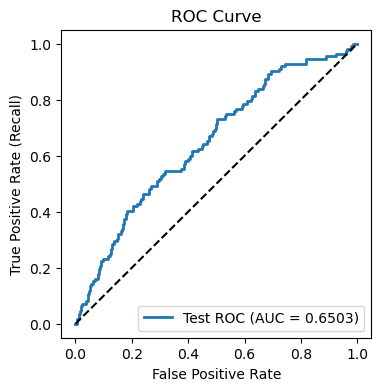

In [20]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=14)

y_pred_train = cross_val_predict(lgb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
y_pred_test = lgb_model.predict_proba(X_test)[:, 1]

cm_train = confusion_matrix(y_train, y_pred_train > 0.1)
cm_test = confusion_matrix(y_test, y_pred_test > 0.1)

# Assuming you have a function to plot confusion matrix
plot_confusion_matrix(cm_train, 'Confusion Matrix (Training Set)')
plot_confusion_matrix(cm_test, 'Confusion Matrix (Test Set)')

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

plot_roc_curve(y_train, y_pred_train, label=f"Train ROC (AUC = {auc_train:.4f})")
plot_roc_curve(y_test, y_pred_test, label=f"Test ROC (AUC = {auc_test:.4f})")
plt.legend(loc="lower right")
plt.show()


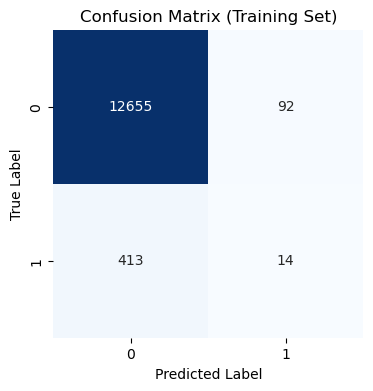

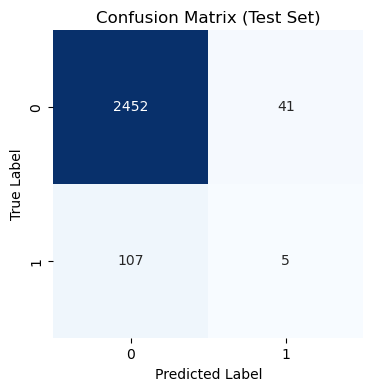

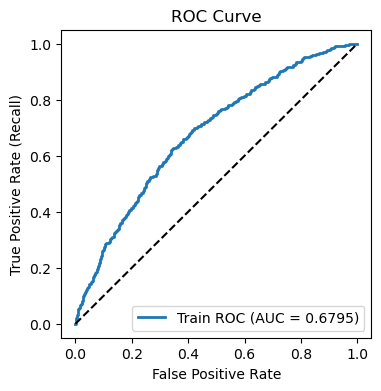

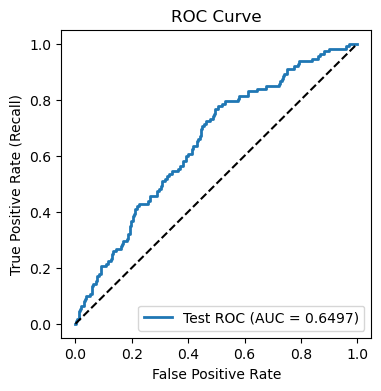

In [21]:
import catboost as cb

# Initialize and train
cb_model = cb.CatBoostClassifier(silent=True)  # silent=True to suppress verbose output
cb_model.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=14)

y_pred_train = cross_val_predict(cb_model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
y_pred_test = cb_model.predict_proba(X_test)[:, 1]

cm_train = confusion_matrix(y_train, y_pred_train > 0.1)
cm_test = confusion_matrix(y_test, y_pred_test > 0.1)

# Assuming you have a function to plot confusion matrix
plot_confusion_matrix(cm_train, 'Confusion Matrix (Training Set)')
plot_confusion_matrix(cm_test, 'Confusion Matrix (Test Set)')

auc_train = roc_auc_score(y_train, y_pred_train)
auc_test = roc_auc_score(y_test, y_pred_test)

plot_roc_curve(y_train, y_pred_train, label=f"Train ROC (AUC = {auc_train:.4f})")
plot_roc_curve(y_test, y_pred_test, label=f"Test ROC (AUC = {auc_test:.4f})")
plt.legend(loc="lower right")
plt.show()
